In [1]:
import numpy as np

# Example: Load and inspect a saved .npy file
file_path = "action_sequences/hello/sequence_0.npy"
data = np.load(file_path, allow_pickle=True)

print(f"Shape of data: {data.shape}")
print(f"First frame keypoints: {data[0]}")

Shape of data: (20,)
First frame keypoints: {'hands': array([[ 5.94963372e-01,  5.11577845e-01, -4.68236863e-08],
       [ 5.58082223e-01,  4.76639807e-01,  2.03040820e-02],
       [ 5.35816669e-01,  4.37063903e-01,  2.76096351e-02],
       [ 5.17200470e-01,  4.14927304e-01,  2.96252184e-02],
       [ 5.00783741e-01,  4.01271403e-01,  3.05592082e-02],
       [ 5.51300943e-01,  3.80616099e-01,  1.95790734e-02],
       [ 5.01683772e-01,  3.47282678e-01,  1.71043929e-02],
       [ 4.70309705e-01,  3.26856434e-01,  1.46849332e-02],
       [ 4.44908470e-01,  3.10470313e-01,  1.26783652e-02],
       [ 5.43638647e-01,  3.80827010e-01,  5.26604755e-03],
       [ 4.89766955e-01,  3.39585423e-01,  2.88819172e-03],
       [ 4.57366347e-01,  3.18289012e-01,  2.04947792e-04],
       [ 4.31687444e-01,  3.01983505e-01, -2.14947737e-03],
       [ 5.30909181e-01,  3.94515276e-01, -8.48986581e-03],
       [ 4.77901578e-01,  3.58163059e-01, -1.23271318e-02],
       [ 4.43614125e-01,  3.40649307e-01, -1.6

In [ ]:
# Verify the shape of X before reshaping
print(f"Shape of X before reshaping: {X_train.shape}")  # (num_samples, SEQUENCE_LENGTH, landmarks, coordinates)
print(f"Number of features used during training: {X_train.shape[2] * X_train.shape[3]}")  # landmarks * coordinates

# Reshape X_train and X_test to flatten the landmarks and coordinates
X_train = X_train.reshape(X_train.shape[0], SEQUENCE_LENGTH, -1)
X_test = X_test.reshape(X_test.shape[0], SEQUENCE_LENGTH, -1)

# Verify the reshaped input
print(f"Shape of X_train after reshaping: {X_train.shape}")  # (num_samples, SEQUENCE_LENGTH, features)

In [2]:
import numpy as np

# Load a sample .npy file
file_path = "action_sequences/hello/sequence_0.npy"
sequence = np.load(file_path, allow_pickle=True)

print(f"Shape of sequence: {sequence.shape}")
print(f"Data in sequence: {sequence}")

Shape of sequence: (20,)
Data in sequence: [{'hands': array([[ 5.94963372e-01,  5.11577845e-01, -4.68236863e-08],
        [ 5.58082223e-01,  4.76639807e-01,  2.03040820e-02],
        [ 5.35816669e-01,  4.37063903e-01,  2.76096351e-02],
        [ 5.17200470e-01,  4.14927304e-01,  2.96252184e-02],
        [ 5.00783741e-01,  4.01271403e-01,  3.05592082e-02],
        [ 5.51300943e-01,  3.80616099e-01,  1.95790734e-02],
        [ 5.01683772e-01,  3.47282678e-01,  1.71043929e-02],
        [ 4.70309705e-01,  3.26856434e-01,  1.46849332e-02],
        [ 4.44908470e-01,  3.10470313e-01,  1.26783652e-02],
        [ 5.43638647e-01,  3.80827010e-01,  5.26604755e-03],
        [ 4.89766955e-01,  3.39585423e-01,  2.88819172e-03],
        [ 4.57366347e-01,  3.18289012e-01,  2.04947792e-04],
        [ 4.31687444e-01,  3.01983505e-01, -2.14947737e-03],
        [ 5.30909181e-01,  3.94515276e-01, -8.48986581e-03],
        [ 4.77901578e-01,  3.58163059e-01, -1.23271318e-02],
        [ 4.43614125e-01,  3.406


Action: hello
Shape of keypoints: (258,)
Distribution of values:
Min: -1.1638
Max: 2.7596
Mean: 0.2774


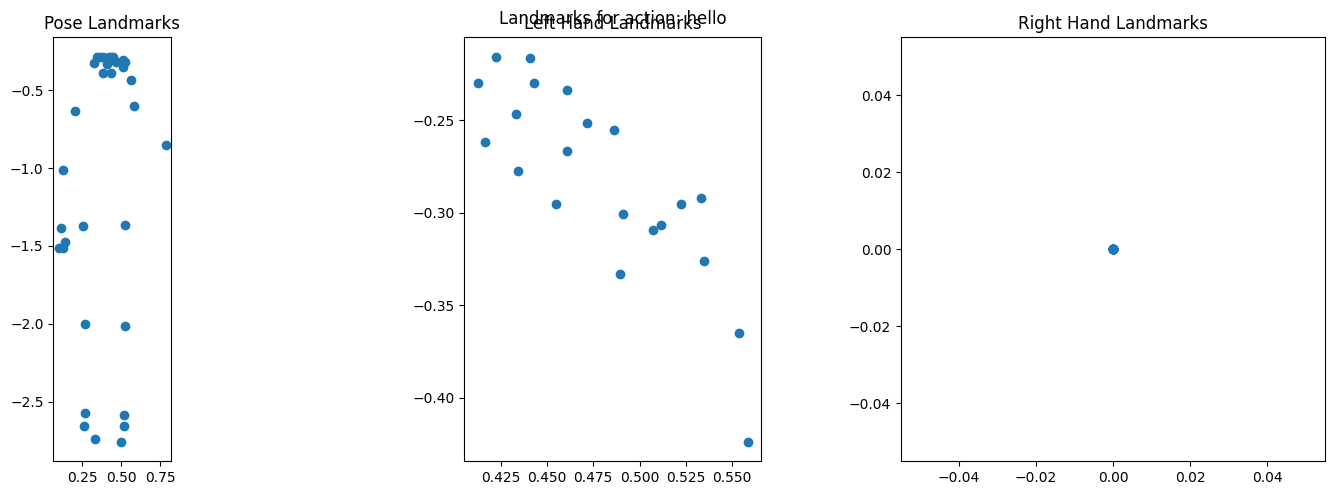


Action: thanks
Shape of keypoints: (258,)
Distribution of values:
Min: -1.5452
Max: 2.7786
Mean: 0.2849


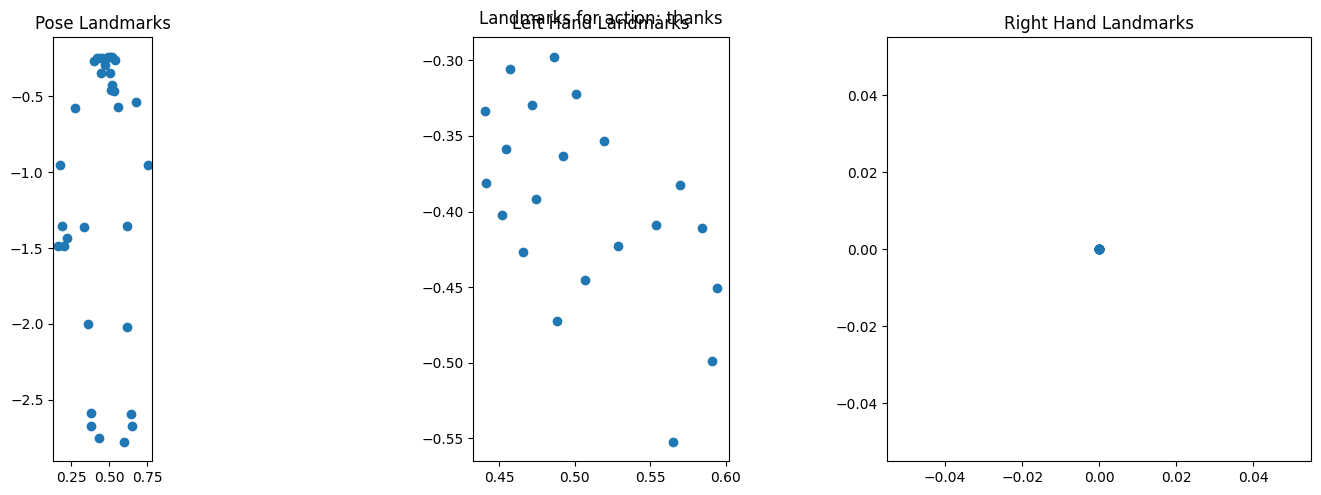


Action: iloveyou
Shape of keypoints: (258,)
Distribution of values:
Min: -1.3323
Max: 2.9296
Mean: 0.3025


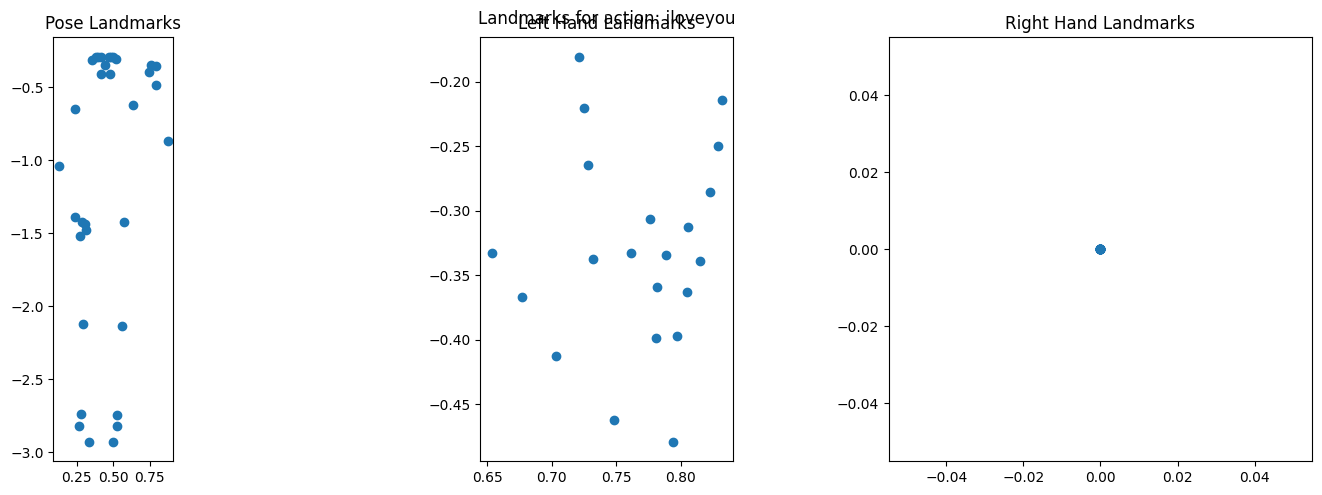

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_npy_file(file_path):
    """Read and return the contents of a .npy file."""
    return np.load(file_path)

def visualize_keypoints(keypoints):
    """Visualize the keypoints from the .npy file."""
    # Extract different landmarks
    pose = keypoints[:33*4].reshape(33, 4)  # 33 pose landmarks with x,y,z,visibility
    left_hand = keypoints[33*4:33*4 + 21*3].reshape(21, 3)  # 21 left hand landmarks with x,y,z
    right_hand = keypoints[33*4 + 21*3:].reshape(21, 3)  # 21 right hand landmarks with x,y,z
    
    # Create subplots for each set of landmarks
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot pose landmarks
    ax1.scatter(pose[:, 0], -pose[:, 1])  # Negative y for correct orientation
    ax1.set_title('Pose Landmarks')
    ax1.set_aspect('equal')
    
    # Plot left hand landmarks
    ax2.scatter(left_hand[:, 0], -left_hand[:, 1])
    ax2.set_title('Left Hand Landmarks')
    ax2.set_aspect('equal')
    
    # Plot right hand landmarks
    ax3.scatter(right_hand[:, 0], -right_hand[:, 1])
    ax3.set_title('Right Hand Landmarks')
    ax3.set_aspect('equal')
    
    plt.tight_layout()
    return fig

def main():
    # Path to the data directory
    DATA_PATH = os.path.join('MP_Data')
    actions = ['hello', 'thanks', 'iloveyou']
    
    # Example: read first frame of first sequence for each action
    for action in actions:
        sequence_path = os.path.join(DATA_PATH, action, '0', '0.npy')
        if os.path.exists(sequence_path):
            # Load the keypoints
            keypoints = read_npy_file(sequence_path)
            print(f"\nAction: {action}")
            print(f"Shape of keypoints: {keypoints.shape}")
            print("Distribution of values:")
            print(f"Min: {keypoints.min():.4f}")
            print(f"Max: {keypoints.max():.4f}")
            print(f"Mean: {keypoints.mean():.4f}")
            
            # Visualize the keypoints
            fig = visualize_keypoints(keypoints)
            plt.suptitle(f'Landmarks for action: {action}')
            plt.show()
        else:
            print(f"No data found for action: {action}")

if __name__ == "__main__":
    main()